# 1.load labaraies
* load the labaraies that are importance
* import warinings to avoid from getting warinings

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Read csv files
* and set delim_whitespace to True, it indicates that the delimiter separating values in a file or a string is whitespace (spaces or tabs)

In [2]:
df=pd.read_csv("D:/Machine Learning/Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
df.size

1113

In [6]:
df.shape

(159, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


descride(skewed or not )
### Data expotary data anlysis(1.histgram,2. cat(barplot),3.pairplot/corr Matrix/Heatmape 4. latitude/longtitude ; map)

In [8]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### 4.data Exploration 
### histrogram
*It provides a visual way to understand the distribution of data and identify patterns or trends.

Text(0.5, 1.0, 'Types of Species')

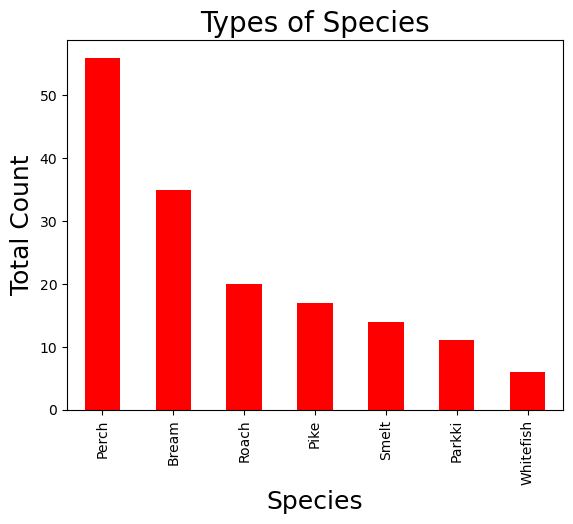

In [9]:
s_count=df["Species"].value_counts()
s_count.plot(kind="bar",color="red")
plt.xlabel("Species", fontsize=18)
plt.ylabel("Total Count",fontsize=18)
plt.title("Types of Species",fontsize=20)

### need to assigin X and y values
* import linera regression 

### latitude/longitude/map
* Mapping latitude and longitude coordinates on a map provides a visual representation of spatial data, enabling the exploration of geographic patterns and relationships.

In [10]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### 8.outliers-n
* finding outlier with boxplot and handling with

<Axes: >

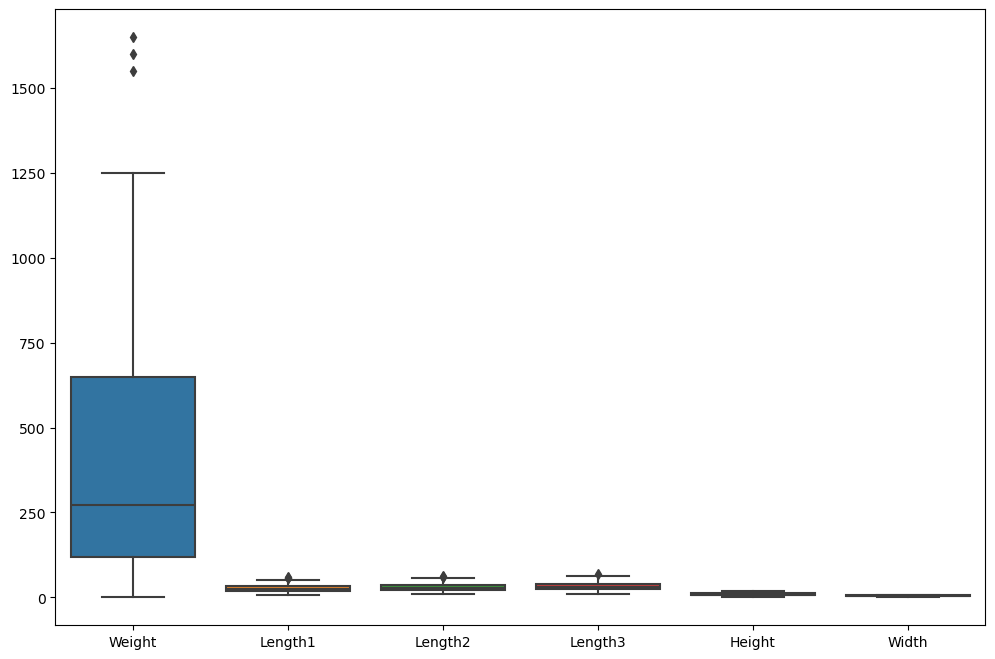

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(df)

In [12]:
for cols in df.columns[::]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3-Q1
    
        low = Q1-1.5*(Q3-Q1)
        high = Q3+1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high)]

<Axes: >

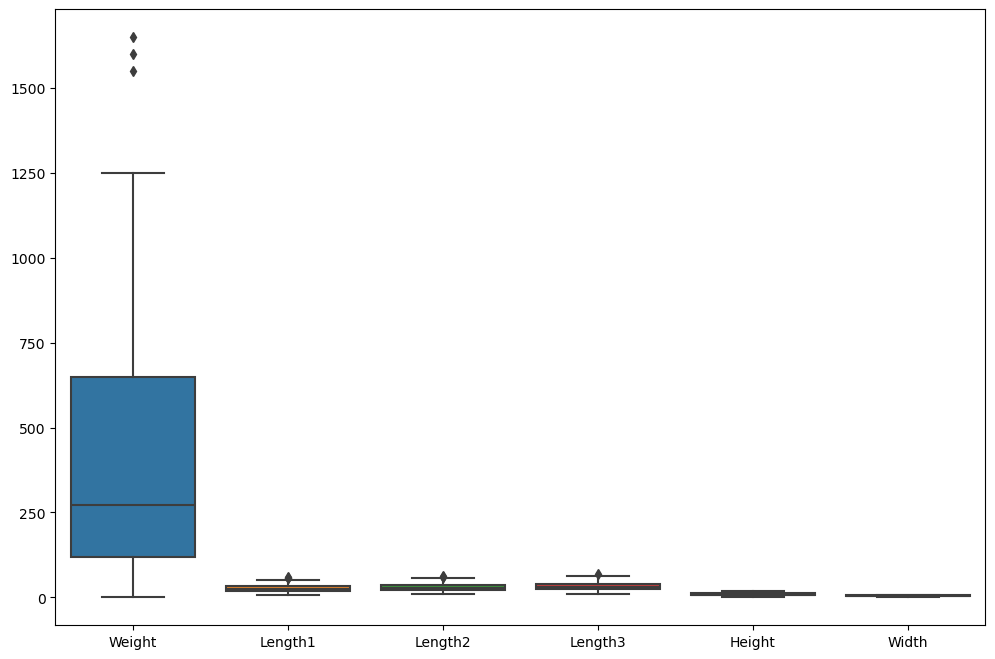

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(df)

### 9. Normalization/standaziation data/ exclude label or target col.
 ### normalization - we use minmax scaling
#### standar- z_score

In [14]:
df=df.drop(columns="Species")

In [15]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [16]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


### need to assigin X and y values
* import linera regression 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=df.drop("Weight",axis=1)
y=df["Weight"]

### Bifactor into train and test 
* x_train,x_test,y_train,y_test

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
X_train.shape

(111, 5)

### import models 
### custatiate model

### Import linear regression
### Bifactor into train and test 
### fit the models of x_train and y_train
* x_train,x_test,y_train,y_test

In [21]:
X= df['Width'].values.reshape(-1,1)

In [22]:
y= df['Weight'].values

### fit the models of x_train and y_train

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()

In [25]:
model.fit(X,y)

LinearRegression()

### find the coef and intercept

In [26]:
model.coef_

array([188.24855477])

In [27]:
model.intercept_

-433.2588525217859

In [1]:
# plt.figure(figsize=(12,8))
# sns.regplot(x=X,y=y)
# plt.xlabel('weight')
# plt.ylabel("width")
# plt.show()

In [87]:
X= df['Length3'].values.reshape(-1,1)

In [88]:
y= df['Weight'].values

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model1=LinearRegression()

In [93]:
model1.fit(X_train,y_train)

LinearRegression()

In [94]:
model1.coef_

array([28.79719013])

In [95]:
model1.intercept_

-500.22200263284213

### find the prediction values 

In [96]:
y_pred=model1.predict(X_test)
y_pred

array([ 1.39075618e+02,  6.89101950e+02,  1.08650317e+03,  4.99040495e+02,
        6.02710379e+02,  3.80972015e+02,  5.01920214e+02,  8.49105555e-01,
       -3.37075226e+01,  1.76511965e+02,  3.46415387e+02,  1.56353932e+02,
        5.88311784e+02,  6.97741107e+02,  2.19707751e+02,  6.68943916e+02,
       -1.43136845e+02, -1.89212349e+02,  5.42236280e+02,  5.07679652e+02,
        1.21897025e+03,  7.23658578e+02,  3.32016792e+02,  1.34279817e+03,
       -1.66174597e+02, -4.91033247e+00,  6.22868412e+02,  3.26257354e+02,
        8.41727057e+02, -1.20099093e+02,  8.10050148e+02,  6.11349536e+02])

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 118.34605993943912 
MSE= 21163.95102242363 
r2= 0.8688213905029951 
RMSE= 145.4783524185768


In [98]:
y_pre=model1.predict(X_train)

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 102.28335294791651 
MSE= 18280.98047460456 
r2= 0.8455889932745347 
RMSE= 135.20717612096098


In [101]:
X= df['Height'].values.reshape(-1,1)

In [102]:
y= df['Weight'].values

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
model2=LinearRegression()

In [107]:
model2.fit(X_train,y_train)

LinearRegression()

In [108]:
model2.coef_

array([59.71092358])

In [109]:
model2.intercept_

-154.22976557851217

In [110]:
y_pred=model2.predict(X_test)
y_pred

array([181.1426078 , 588.05463871, 378.76188047, 657.98210131,
       479.24939376, 357.37342765, 178.24065691, 238.50092099,
        93.40337669, 175.52380989, 312.73354118, 232.41040678,
       186.58824403, 854.2638493 , 236.87678386, 769.4146269 ,
       -29.83996958, -50.40441166, 703.89980155, 412.12834457,
       483.85907706, 510.65136847, 273.7303659 , 418.99510078,
       -51.02540526, 119.98667987, 495.48479389, 342.74425137,
       591.48801682, -22.60300564, 280.46575808, 779.23110273])

### find the errors types 
* MAE 
* MSE
* r2
* RMSE

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 189.5993706714391 
MSE= 94176.6534453889 
r2= 0.41627333984291703 
RMSE= 306.88214911491497


In [112]:
y_pre=model2.predict(X_train)

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 152.7501814256412 
MSE= 52422.010664730486 
r2= 0.5572154648620284 
RMSE= 228.958534815216


In [115]:
X=df[['Height','Length3']].values

In [116]:
y= df['Weight'].values

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model3=LinearRegression()

In [121]:
model3.fit(X_train,y_train)

LinearRegression()

In [122]:
model3.coef_

array([13.68935452, 24.9227926 ])

In [123]:
model3.intercept_

-505.17575807342877

In [124]:
y_pred=model3.predict(X_test)
y_pred

array([ 124.99786622,  694.31204911,  990.26403043,  545.85322105,
        594.59892951,  374.75208498,  438.35975033,   18.5184557 ,
        -44.65402691,  156.10932834,  334.61057242,  151.70522157,
        515.04189988,  762.82013616,  207.55932901,  718.44477079,
       -167.61546651, -212.20654837,  593.76452357,  496.96551051,
       1129.00350927,  706.47388996,  313.20728975, 1221.30077163,
       -192.41068358,  -13.63673367,  615.76701982,  324.04488719,
        827.18998777, -146.01808267,  728.46980607,  670.84971547])

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 120.19864376096392 
MSE= 20702.22565520306 
r2= 0.8716832612178402 
RMSE= 143.88268017799453


In [126]:
y_pre=model3.predict(X_train)

In [127]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 98.23691746490381 
MSE= 16625.71717839809 
r2= 0.859570238553912 
RMSE= 128.94075065082447


In [128]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [129]:
X=df[[ 'Length1', 'Length2', 'Length3', 'Height', 'Width']].values

In [130]:
y= df['Weight'].values

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
model4=LinearRegression()

In [135]:
model4.fit(X_train,y_train)

LinearRegression()

In [136]:
model4.coef_

array([ 63.81694501, -10.75828422, -28.61681838,  27.58208889,
        41.20869372])

In [137]:
model4.intercept_

-509.4756051185872

In [138]:
y_pred=model4.predict(X_test)
y_pred

array([  89.42407787,  870.59971093,  940.40318415,  466.52820514,
        747.37885096,  352.83686151,  354.3560225 ,   15.19873723,
        -93.67152345,  174.63662747,  389.76941001,  146.7526642 ,
        394.80294868,  727.24073006,  190.87997433,  660.81078991,
       -191.88487357, -239.34087675,  547.43168929,  512.78668736,
       1080.70664269,  791.92710368,  364.92196548, 1105.27415309,
       -215.92042022,   16.39787283,  734.54441702,  424.97471031,
        963.97277978, -180.67782473,  662.83206508,  640.20427201])

In [139]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 109.06327142039422 
MSE= 21303.01327901212 
r2= 0.8679594534557271 
RMSE= 145.95551815197712


In [140]:
y_pre=model4.predict(X_train)

In [141]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 86.13313427475353 
MSE= 13170.813293486503 
r2= 0.8887522174827779 
RMSE= 114.76416380336896


In [142]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [143]:
lasso_reg.score(X_test,y_test)

0.8690935110940595

In [144]:
lasso_reg.score(X_train,y_train)

0.8885549775969757

In [145]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

Ridge()

In [147]:
ridge_reg.score(X_test,y_test)

0.8684366673973545

In [146]:
ridge_reg.score(X_train,y_train)

0.8887150381090348

In [148]:
from sklearn.linear_model import ElasticNet
En_reg = ElasticNet()
En_reg.fit(X_train,y_train)

ElasticNet()

In [149]:
En_reg.score(X_test,y_test)

0.8776328958397241

In [150]:
En_reg.score(X_test,y_test)

0.8776328958397241